In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [50]:
# Constant
mu0 = 4 * np.pi * 1e-7   # T·m/A

# Coil parameters (SI units)
R = 0.015   # meters
s = 0.02    # meters
N = 100

def calc_B(I_mA):
    """
    Input:
        I_mA : current in milliAmps
    Output:
        Magnetic field in nanoTesla
    """
    I_A = I_mA * 1e-3        # Convert mA → A
    
    B_T = (mu0 * N * I_A * R**2) / ((R**2 + (s/2)**2)**(3/2))
    
    B_nT = B_T * 1e9         # Convert T → nT
    return B_nT

#Theoretical Slope
k_SI = (mu0 * N * R**2) / ((R**2 + (s/2)**2)**(3/2))
k_th = k_SI * 1e6 # nT per mA

# Example
B = calc_B(0.01)
print("Magnetic Field $B_z$ (nT):", B)


Magnetic Field $B_z$ (nT): 48.25778016201222


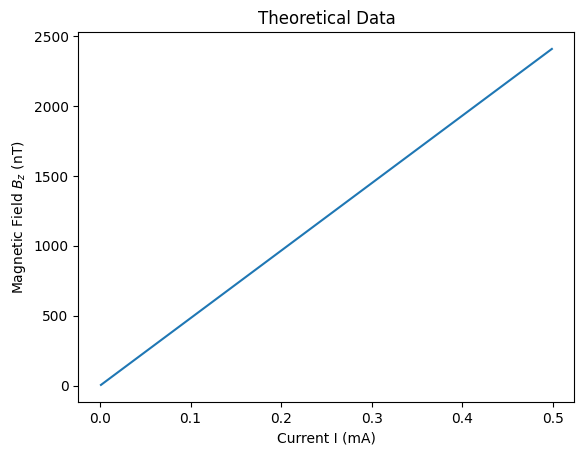

In [4]:
I_mult = np.arange(0.001,0.5,0.001) #mA
B_mult = calc_B(I_mult)

plt.plot(I_mult, B_mult)
plt.title("Theoretical Data")
plt.xlabel("Current I (mA)")
plt.ylabel("Magnetic Field $B_z$ (nT)")
plt.show()

In [5]:
df_t = pd.DataFrame([I_mult, B_mult]).T
df_t.columns = ["current", "field"]
df_t


,current,field
0,0.001,4.825778
1,0.002,9.651556
2,0.003,14.477334
3,0.004,19.303112
4,0.005,24.128890
...,...,...
494,0.495,2388.760118
495,0.496,2393.585896
496,0.497,2398.411674
497,0.498,2403.237452


In [6]:
# mod_z (mA)
# amplitude (mV/sqrt(Hz))
# signal (V)
df = pd.read_csv('magnetometer_data.csv')

In [7]:
df['signal_amplitude'] = df['signal_ceil']-df['signal_floor'] 
df

,mod_z,amplitude,signal_floor,signal_ceil,signal_amplitude
0,0.500,230.0,2.30,3.000,0.700
1,0.500,230.0,1.20,1.800,0.600
2,0.100,50.0,1.50,1.600,0.100
3,0.050,23.0,2.60,2.650,0.050
4,0.010,5.0,2.60,2.625,0.025
5,0.020,11.5,2.55,2.575,0.025
6,0.030,17.0,2.50,2.540,0.040
7,0.040,18.0,1.80,1.850,0.050
8,0.050,25.0,2.30,2.350,0.050
9,0.075,40.0,2.20,2.300,0.100


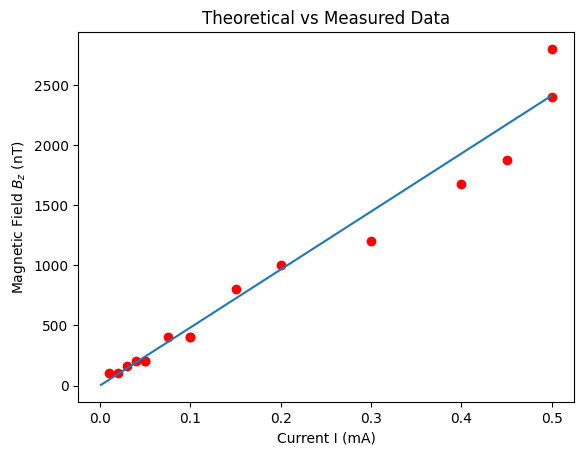

In [8]:
# Factor from signal_amplitude to magnetic field
estimated_factor = 4e3


plt.plot(I_mult, B_mult)
plt.scatter(df['mod_z'], df['signal_amplitude']*estimated_factor, color='red')
plt.title("Theoretical vs Measured Data")
plt.xlabel("Current I (mA)")
plt.ylabel("Magnetic Field $B_z$ (nT)")
plt.show()


Slope (m): [1.18856494]
Intercept (b): [-0.00349879]
Factor: 4060.1719344933417


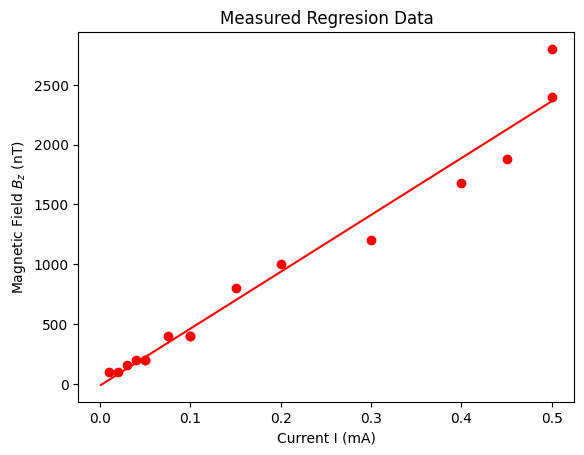

In [9]:
X = np.array(df["mod_z"]).reshape(-1, 1)
Y = np.array(df["signal_amplitude"]).reshape(-1, 1)
lnr = LinearRegression()
lnr.fit(X,Y)
# Results
calculated_factor = k_th/lnr.coef_[0][0]

print("Slope (m):", lnr.coef_[0])
print("Intercept (b):", lnr.intercept_)
print("Factor:", calculated_factor)

y_pred = lnr.predict(I_mult.reshape(-1,1))

plt.scatter(df['mod_z'], df['signal_amplitude']*estimated_factor, color='red')
plt.plot(I_mult, y_pred*estimated_factor, color='red')
plt.title("Measured Regresion Data")
plt.xlabel("Current I (mA)")
plt.ylabel("Magnetic Field $B_z$ (nT)")
plt.show()



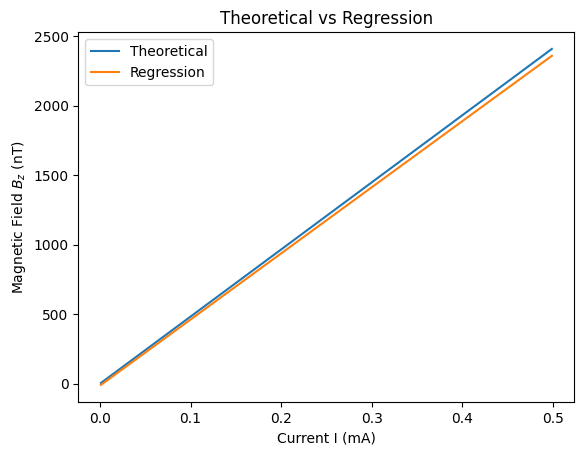

In [10]:
plt.plot(I_mult, B_mult, label='Theoretical')
plt.plot(I_mult, y_pred*estimated_factor, label='Regression')
plt.title("Theoretical vs Regression")
plt.xlabel("Current I (mA)")
plt.ylabel("Magnetic Field $B_z$ (nT)")
plt.legend()
plt.show()


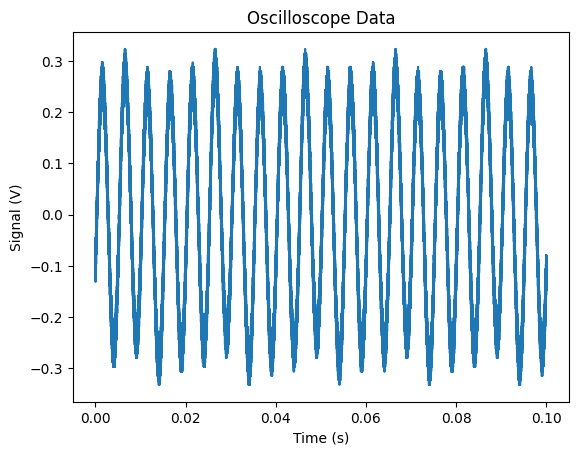

In [40]:
data_2 = pd.read_csv("Rigol_045.csv")
data_2["Time(s)"] = data_2["Time(s)"] + np.abs(data_2["Time(s)"].min()+1e-10)
data_2["Frequency(Hz)"] = 1/ data_2["Time(s)"]

plt.plot(data_2["Time(s)"], data_2["CH1(V)"])
plt.title("Oscilloscope Data")
plt.xlabel("Time (s)")
plt.ylabel("Signal (V)")
plt.show()

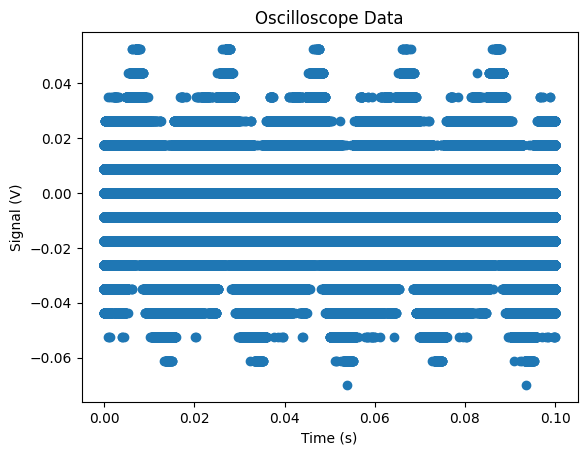

In [49]:
data_2 = pd.read_csv("RigolDS001.csv")
data_2["Time(s)"] = data_2["Time(s)"] + np.abs(data_2["Time(s)"].min()+1e-10)
data_2["Frequency(Hz)"] = 1/ data_2["Time(s)"]

plt.scatter(data_2["Time(s)"], data_2["CH1(V)"])
plt.title("Oscilloscope Data")
plt.xlabel("Time (s)")
plt.ylabel("Signal (V)")
plt.show()

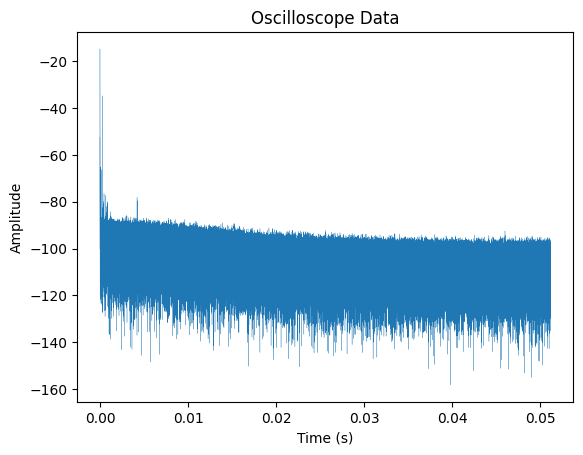

In [47]:
plt.plot(data_2["Time(s)"], data_2["MATH1(dBV)"], linewidth=0.2)
plt.title("Oscilloscope Data")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

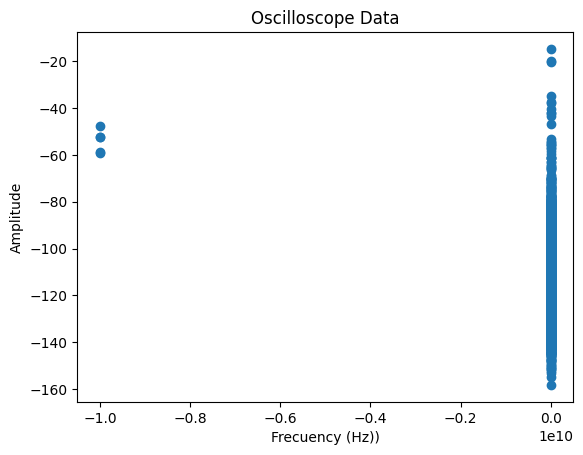

In [32]:
plt.scatter(data_2["Frequency(Hz)"], data_2["MATH1(dBV)"])
plt.title("Oscilloscope Data")
plt.xlabel("Frecuency (Hz))")
plt.ylabel("Amplitude")
plt.show()

In [39]:
np.linspace(0.01, 0.5, 10)
np.linspace(0.001, 0.01, 5)

array([0.001  , 0.00325, 0.0055 , 0.00775, 0.01   ])

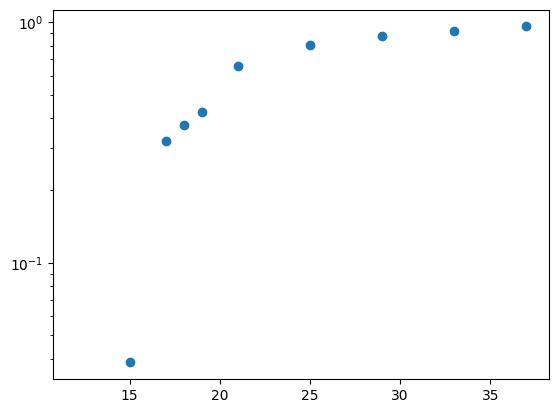

In [ ]:
filenames = [12,15,17,18,19,21,25,29,33,37]
means = []
for i in filenames:
    data_t = pd.read_csv(f"im/RigolDSim{i}.csv")
    means.append(data_t["CH1(V)"].mean())

plt.scatter(filenames, means)
# plt.title("Oscilloscope Data")
# plt.xlabel("Time (s)")
# plt.ylabel("Signal (V)")
# plt.yscale('log')
plt.show()